In [3]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [4]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])


In [9]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


In [10]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


In [11]:
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 1.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 0.        , 0.        ]])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124,  1.        ,         nan],
       [ 1.33630621,         nan,  1.        ],
       [-1.06904497, -1.        , -1.        ]])

In [17]:
test_data.drop('one', axis=1)

,two,three
0,2.0,NaN
1,NaN,4.0
2,1.0,2.0


In [19]:
%matplotlib inline
vis_data = pd.read_csv("./train.csv",
                       encoding = 'ISO-8859-1',
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


<AxesSubplot:>

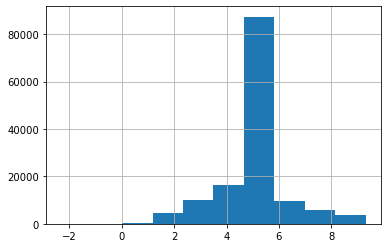

In [20]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist()

<AxesSubplot:>

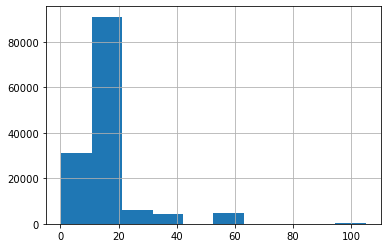

In [21]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

In [29]:
import seaborn as sns
corr = vis_data.drop(['violation_zip_code', 'payment_amount',
                      'clean_up_cost',
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5,250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\77780\AppData\Local\Temp\ipykernel_21284\4212639271.py:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
admin_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


In [33]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("./train.csv",
                       encoding = 'ISO-8859-1',
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("./latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: './latlons.csv'